### 📌 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

### 📌 2. Load Dataset

In [2]:
df = pd.read_csv('mall_visitors.csv') 
df.head()

,VisitorID,Total_Visits,Total_Purchases,Avg_Time_Spent,Avg_Amount_Spent,Time_Since_Last_Visit,Unique_Shops_Visited,Purchase_to_Visit_Ratio,Last_Visit_Purchase
0,V1000,3,5,65.187175,361.839933,81,9,1.67,1
1,V1001,2,2,62.786943,574.022574,53,3,1.00,0
2,V1002,7,3,76.306686,558.196822,44,1,0.43,1
3,V1003,2,1,26.934890,592.548230,87,1,0.50,1
4,V1004,2,0,119.595773,806.553951,36,17,0.00,0


### 📌 3. Data Overview

In [3]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   VisitorID                4000 non-null   object 
 1   Total_Visits             4000 non-null   int64  
 2   Total_Purchases          4000 non-null   int64  
 3   Avg_Time_Spent           4000 non-null   float64
 4   Avg_Amount_Spent         4000 non-null   float64
 5   Time_Since_Last_Visit    4000 non-null   int64  
 6   Unique_Shops_Visited     4000 non-null   int64  
 7   Purchase_to_Visit_Ratio  4000 non-null   float64
 8   Last_Visit_Purchase      4000 non-null   int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 281.4+ KB


In [4]:
df.describe()

,Total_Visits,Total_Purchases,Avg_Time_Spent,Avg_Amount_Spent,Time_Since_Last_Visit,Unique_Shops_Visited,Purchase_to_Visit_Ratio,Last_Visit_Purchase
count,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,5.048000,1.98075,90.611845,499.015647,44.689500,9.900500,0.500695,0.403250
std,2.219443,1.41311,30.117260,200.104076,25.992682,5.457797,0.507284,0.490611
min,1.000000,0.00000,10.000000,50.000000,1.000000,1.000000,0.000000,0.000000
25%,3.000000,1.00000,70.670829,361.254677,22.000000,5.000000,0.180000,0.000000
50%,5.000000,2.00000,90.505938,498.154727,44.000000,10.000000,0.380000,0.000000
75%,6.000000,3.00000,110.446889,634.322099,67.000000,15.000000,0.670000,1.000000
max,16.000000,9.00000,206.741308,1181.393318,89.000000,19.000000,5.000000,1.000000


### 📌 4. Correlation Matrix

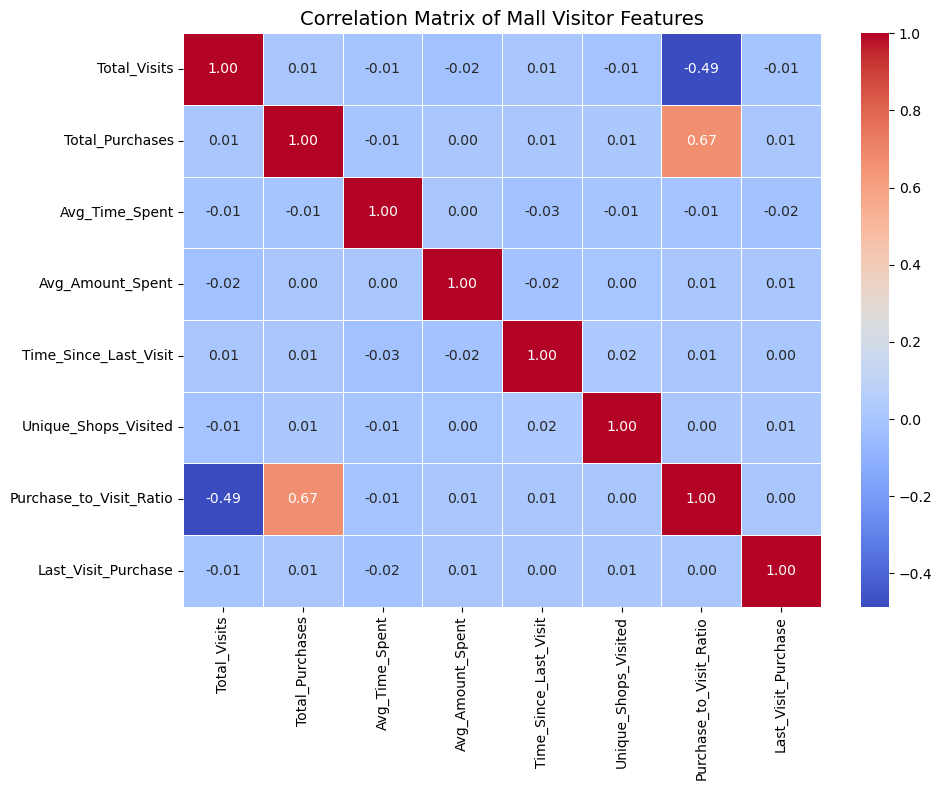

In [5]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Mall Visitor Features", fontsize=14)
plt.tight_layout()
plt.show()

### 📌 5. Drop Irrelevant Column

In [6]:
df.drop("VisitorID", axis=1, inplace=True)

### 📌 6. Define Feature Columns

In [7]:
numerical_columns = df.drop("Last_Visit_Purchase", axis=1).columns.tolist()
categorical_columns = ["Last_Visit_Purchase"]

### 📌 7. Create Pipelines

In [8]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_columns),
    ('cat', categorical_pipeline, categorical_columns)
])

### 📌 8. Elbow Method to Find Optimal Clusters

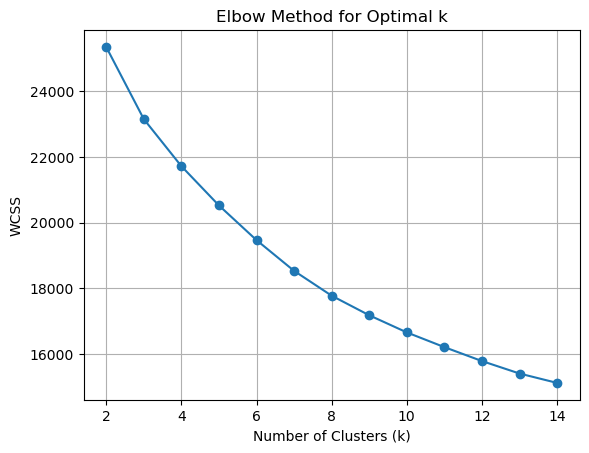

In [9]:
wcss = []

for k in range(2, 15):
    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('kmeans', KMeans(n_clusters=k, random_state=42))
    ])
    pipeline.fit(df)
    wcss.append(pipeline.named_steps['kmeans'].inertia_)

plt.plot(range(2, 15), wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()

### 📌 9. Final Clustering and PCA and Visualization

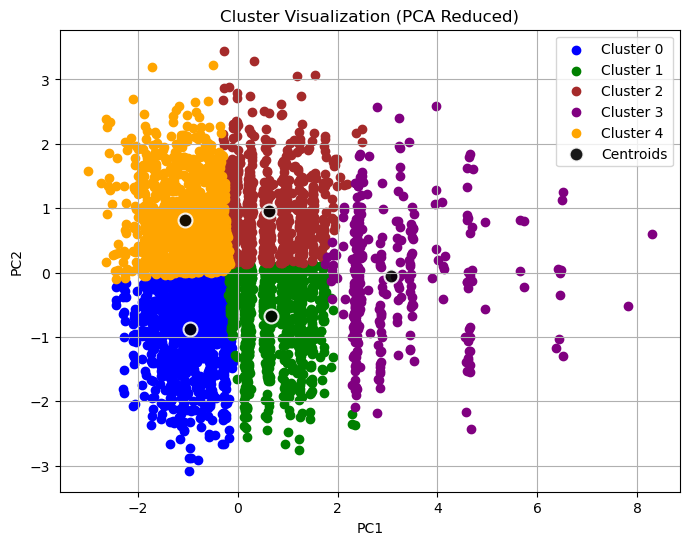

In [10]:
df_preprocessed = preprocessor.fit_transform(df)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_preprocessed)

kmeans = KMeans(n_clusters=5, random_state=42)
Clusters = kmeans.fit_predict(reduced_data)

plt.figure(figsize=(8,6))
plt.scatter(reduced_data[Clusters == 0, 0], reduced_data[Clusters == 0, 1], color='blue', label='Cluster 0')
plt.scatter(reduced_data[Clusters == 1, 0], reduced_data[Clusters == 1, 1], color='green', label='Cluster 1')
plt.scatter(reduced_data[Clusters == 2, 0], reduced_data[Clusters == 2, 1], color='brown', label='Cluster 2')
plt.scatter(reduced_data[Clusters == 3, 0], reduced_data[Clusters == 3, 1], color='purple', label='Cluster 3')
plt.scatter(reduced_data[Clusters == 4, 0], reduced_data[Clusters == 4, 1], color='orange', label='Cluster 4')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.9, marker='o',
            edgecolors='white', linewidths=1.5, label='Centroids')

plt.title('Cluster Visualization (PCA Reduced)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
optimal_k = 5
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('kmeans', KMeans(n_clusters=optimal_k, random_state=42))
])
pipeline.fit(df)

df_clustered = df.copy()
df_clustered['Clusters'] = pipeline.named_steps['kmeans'].labels_

cluster_labels = {
    0: "Window Shoppers",
    1: "Loyal Customers",
    2: "Quick Visitors",
    3: "Frequent Buyers",
    4: "Average Explorers"
}
df_clustered['Cluster_Label'] = df_clustered['Clusters'].map(cluster_labels)

print(df_clustered['Clusters'].unique())


[1 3 2 4 0]


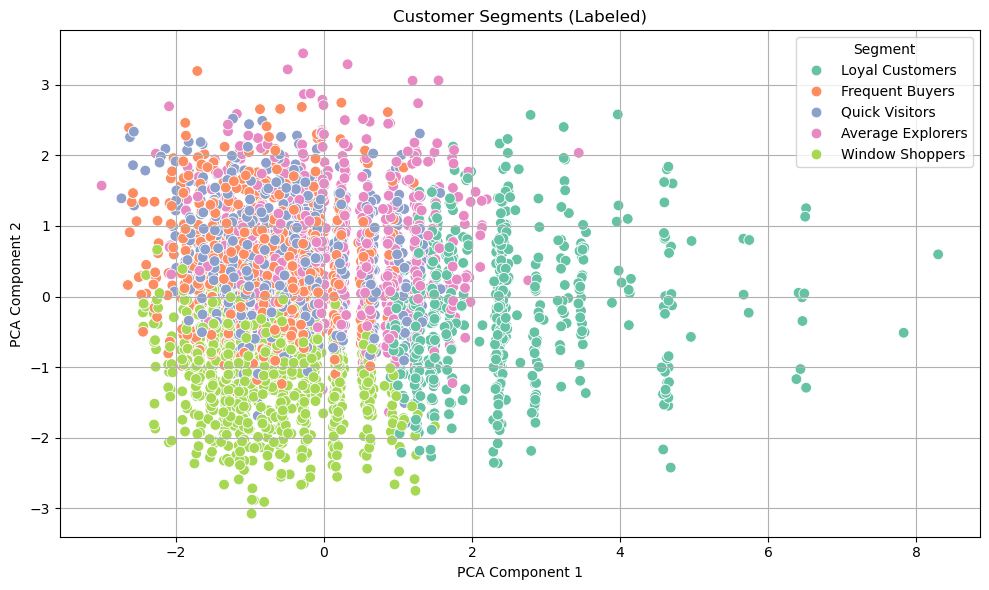

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=reduced_data[:, 0],
    y=reduced_data[:, 1],
    hue=df_clustered['Cluster_Label'],
    palette='Set2',
    s=60
)
plt.title("Customer Segments (Labeled)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Segment")
plt.grid(True)
plt.tight_layout()
plt.show()